In [23]:
import osmnx as ox

G_addr = ox.graph_from_address("Av. Juarez 100, Guadalajara, Mexico", dist=1000, network_type="walk")

In [ ]:
import geopandas as gpd
import osmnx as ox
import os

def load_polygon_and_create_graph():

    graphml_path = "graphs/ZMG_walk.graphml"
    geojson_path = "osm/ZMG_enclosure_2km.geojson"

    # if graphml exists, load and return it
    if os.path.exists(graphml_path):
        print(f"Loading graph from {graphml_path}")
        return ox.load_graphml(graphml_path)

    # otherwise read geojson, build graph from polygon and save it
    gdf_local = gpd.read_file(geojson_path)
    if gdf_local.empty:
        raise ValueError(f"No geometry found in {geojson_path}")
    poly_local = gdf_local.geometry.iloc[0]

    G_local = ox.graph_from_polygon(poly_local, network_type="walk")

    # ensure output directory exists
    os.makedirs(os.path.dirname(graphml_path), exist_ok=True)
    ox.save_graphml(G_local, graphml_path)
    print(f"Graph created and saved to {graphml_path}")

    return G_local

In [30]:
G = ox.graph_from_polygon(poly, network_type="walk")

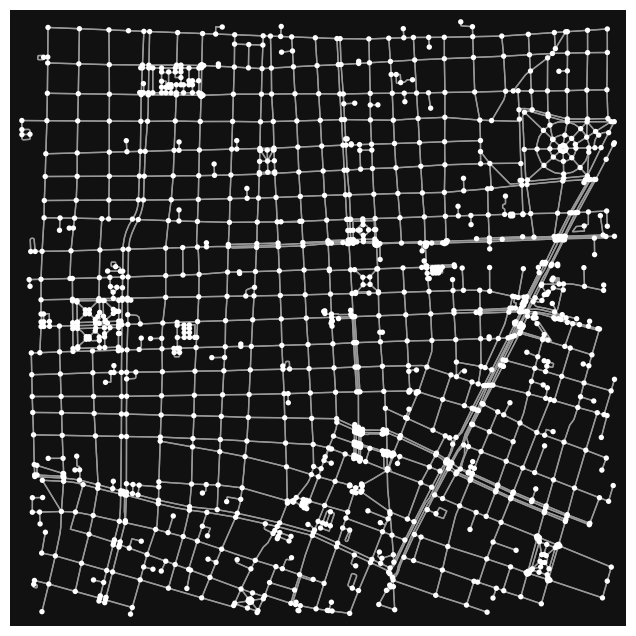

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
ox.plot_graph(G_addr)

In [32]:
# show the first node and its attributes
first_node = next(iter(G_addr.nodes()))
print("First node id:", first_node)

attrs = G_addr.nodes[first_node]
print("Attributes:")
for k, v in attrs.items():
    print(f"  {k}: {v}")

First node id: 28791315
Attributes:
  y: 20.6748646
  x: -103.3564342
  highway: traffic_signals
  street_count: 4


In [33]:
# outgoing neighbors (successors)
out_neighbors = list(G_addr.successors(first_node))
print("Outgoing neighbors:", out_neighbors)

# incoming neighbors (predecessors)
in_neighbors = list(G_addr.predecessors(first_node))
print("Incoming neighbors:", in_neighbors)

# all unique neighbors (ignore direction)
all_neighbors = list(set(out_neighbors) | set(in_neighbors))
print("All neighbors:", all_neighbors)

Outgoing neighbors: [130154244, 12754609152, 12754609189, 12754609193]
Incoming neighbors: [130154244, 12754609152, 12754609189, 12754609193]
All neighbors: [12754609152, 130154244, 12754609189, 12754609193]


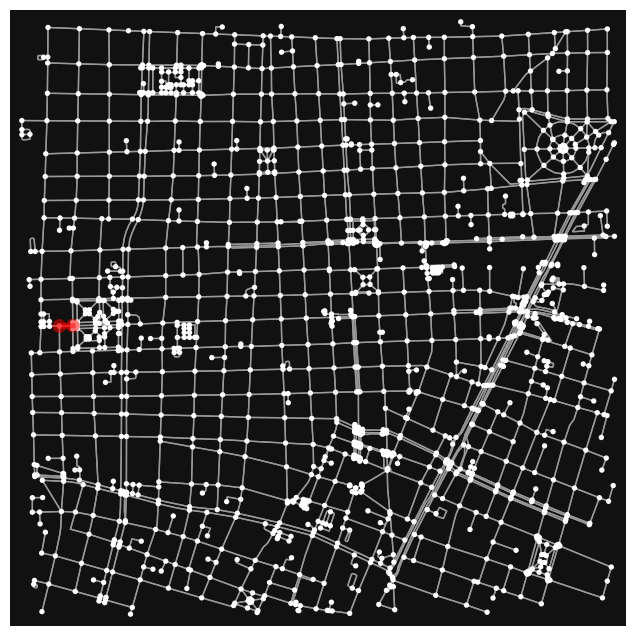

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [34]:
route = [first_node, out_neighbors[0]]  # example route

ox.plot_graph_route(G_addr, route)

In [36]:
# save the existing graph to GraphML
filename = "ZMG_walk.graphml"
ox.save_graphml(G, filename)
print(f"Graph saved to {filename}")

Graph saved to ZMG_walk.graphml
